In [3]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt'
dat= 'co2_mm_mlo.txt'
urllib.request.urlretrieve(url, dat)
# Loading of dataframe

('co2_mm_mlo.txt', <email.message.Message at 0x22a9c466190>)

In [9]:
print(type(dat))

<class 'str'>


In [12]:
from io import StringIO
import pandas as pd
df=StringIO(dat)
df=pd.read_csv(df)
print(df)


Empty DataFrame
Columns: [co2_mm_mlo.txt]
Index: []


Conlverting the data to arrays

In [27]:
import pandas as pd
df = np.genfromtxt(dat, skip_header=70)
# Skipping the initial lines to generate numerical values

In [28]:
print(df)


[[ 1.9590000e+03  3.0000000e+00  1.9592027e+03 ... -1.0000000e+00
  -9.9900000e+00 -9.9000000e-01]
 [ 1.9590000e+03  4.0000000e+00  1.9592877e+03 ... -1.0000000e+00
  -9.9900000e+00 -9.9000000e-01]
 [ 1.9590000e+03  5.0000000e+00  1.9593699e+03 ... -1.0000000e+00
  -9.9900000e+00 -9.9000000e-01]
 ...
 [ 2.0230000e+03  5.0000000e+00  2.0233750e+03 ...  3.1000000e+01
   6.9000000e-01  2.4000000e-01]
 [ 2.0230000e+03  6.0000000e+00  2.0234583e+03 ...  2.9000000e+01
   5.4000000e-01  1.9000000e-01]
 [ 2.0230000e+03  7.0000000e+00  2.0235417e+03 ...  3.1000000e+01
   5.7000000e-01  2.0000000e-01]]


In [29]:
df=pd.DataFrame(df)
# converting to the dataframe

In [30]:
print(df)

          0    1          2       3       4     5     6     7
0    1959.0  3.0  1959.2027  316.65  315.38  -1.0 -9.99 -0.99
1    1959.0  4.0  1959.2877  317.72  315.41  -1.0 -9.99 -0.99
2    1959.0  5.0  1959.3699  318.29  315.49  -1.0 -9.99 -0.99
3    1959.0  6.0  1959.4548  318.15  316.03  -1.0 -9.99 -0.99
4    1959.0  7.0  1959.5370  316.54  315.86  -1.0 -9.99 -0.99
..      ...  ...        ...     ...     ...   ...   ...   ...
768  2023.0  3.0  2023.2083  420.98  419.53  30.0  0.74  0.26
769  2023.0  4.0  2023.2917  423.36  420.69  28.0  0.60  0.22
770  2023.0  5.0  2023.3750  424.00  420.55  31.0  0.69  0.24
771  2023.0  6.0  2023.4583  423.68  421.18  29.0  0.54  0.19
772  2023.0  7.0  2023.5417  422.14  421.76  31.0  0.57  0.20

[773 rows x 8 columns]


extracting the monthly column of measured Co2

In [31]:
col=df[3]
# extracting the monthly column of measured Co2

In [32]:
print(col)

0      316.65
1      317.72
2      318.29
3      318.15
4      316.54
        ...  
768    420.98
769    423.36
770    424.00
771    423.68
772    422.14
Name: 3, Length: 773, dtype: float64


In [33]:
avg=col.mean()

In [34]:
print(avg)

358.9802328589905


Plot the monthly averages as a function of time

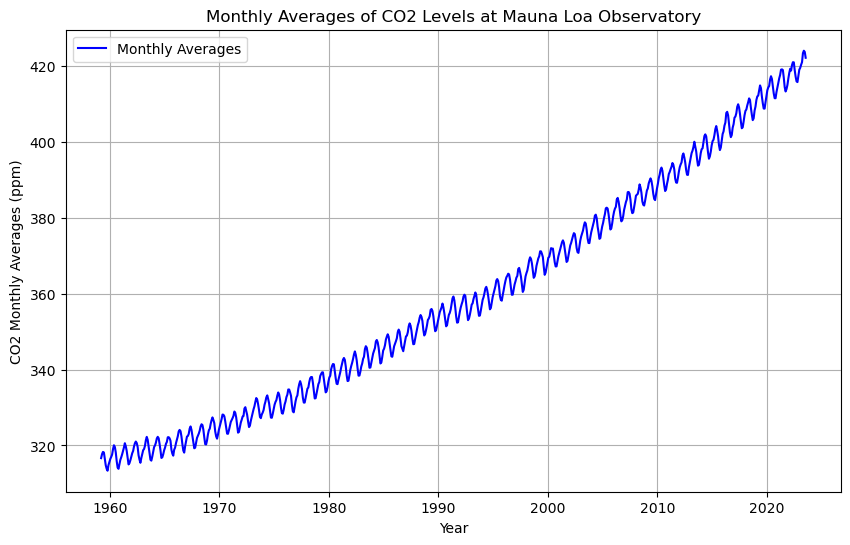

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(df[2], df[3], label='Monthly Averages', color='blue')
plt.xlabel('Year')
plt.ylabel('CO2 Monthly Averages (ppm)')
plt.title('Monthly Averages of CO2 Levels ')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
df['Time Interval'] = df[2].diff()
print(df['Time Interval'])

0         NaN
1      0.0850
2      0.0822
3      0.0849
4      0.0822
        ...  
768    0.0833
769    0.0834
770    0.0833
771    0.0833
772    0.0834
Name: Time Interval, Length: 773, dtype: float64


In [56]:
co2_rate = df[3].diff() / df['Time Interval']
print(co2_rate )

0            NaN
1      12.588235
2       6.934307
3      -1.648999
4     -19.586375
         ...    
768     8.163265
769    28.537170
770     7.683073
771    -3.841537
772   -18.465228
Length: 773, dtype: float64


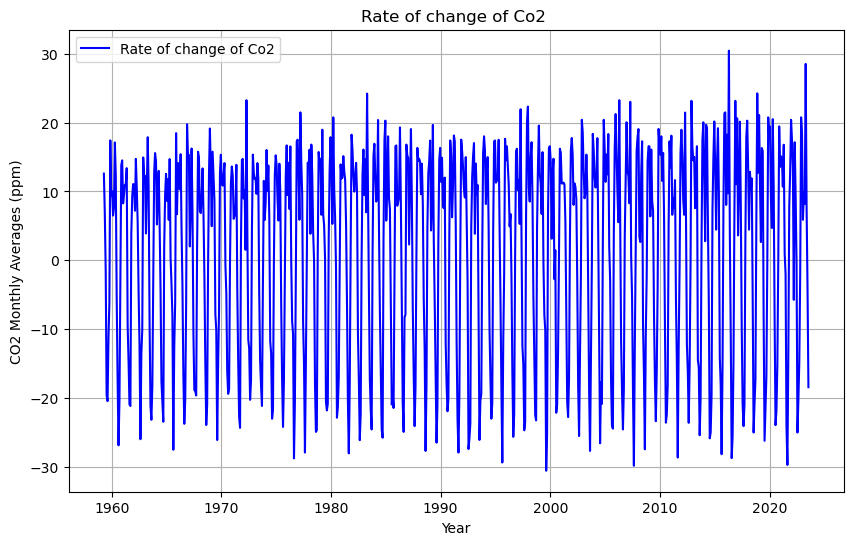

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(df[2], co2_rate, label='Rate of change of Co2', color='blue')
plt.xlabel('Year')
plt.ylabel('CO2 Monthly Averages (ppm)')
plt.title('Rate of change of Co2 ')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
print(co2_rate.mean())

1.6523188768282067


In [57]:
from scipy.stats import linregress
df1=df[2].fillna(0)
co2_rate=co2_rate.fillna(0)
slope, intercept, r_value, p_value, std_err = linregress(df1, co2_rate)



In [58]:
print(slope)
# Since slope is positive so co2 rate is increasing

0.029388524865187227
